<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_1_Course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train: [1. 2.]
y_train: [300. 500.]
Number of training exampels is : 2
 number of training examples using len function is :2
 training examples number :0 (x^0,y^0)= (1.0,300.0)


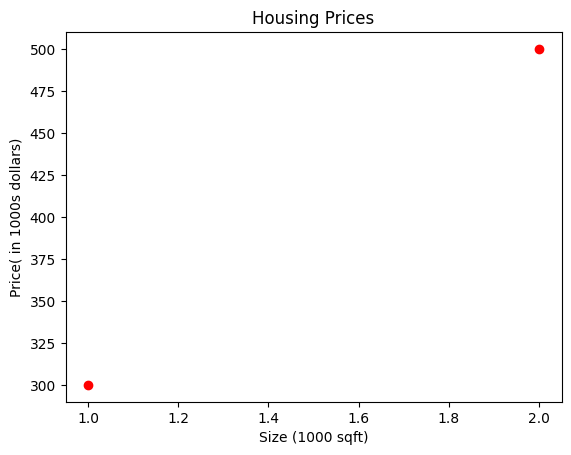

 w: 100
 b: 100
[200. 300.]


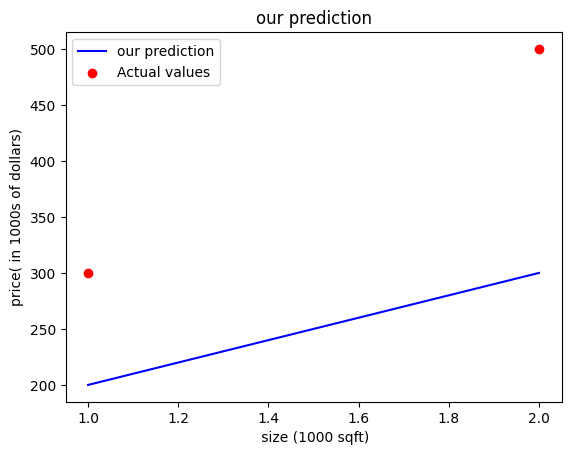

In [ ]:
# lab for model representation
import numpy as np
import matplotlib.pyplot as plt

x_train =np.array([1.0,2.0])
y_train =np.array([300.0,500.0])
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

#to get number of training examples
m =x_train.shape[0]
print(f"Number of training exampels is : {m}")
# you can use len function too
m_len =len(x_train)
print(f" number of training examples using len function is :{m_len}")
# we need to set a way to access training set, so we will i=0 then use it
i = 0
x_i =x_train[i]
y_i =y_train[i] # you can change i to access specific example
print(f" training examples number :{i} (x^{i},y^{i})= ({x_i},{y_i})")

# you can plot data using scatter plot
plt.scatter(x_train,y_train,c ='r')
plt.title("Housing Prices")
plt.ylabel("Price( in 1000s dollars)")
plt.xlabel("Size (1000 sqft)")
plt.show()

# now that we have the training set let's represent the model
# first we set parameters w,b with intial values
w=100
b=100
print(f" w: {w}")
print(f" b: {b}")
#now let's compute f_wb(x(i))
#x(0)----f_wb=w*x(0)+b
#x(1)----f_wb=w*x(1)+b

def compute_model_output(x,w,b):
  m=x.shape[0]
  f_wb=np.zeros(m)
  for i in range(m):
    f_wb[i]=w*x[i]+b
  return f_wb

#let's give it a try and compute the output based on given data
temp_f_wb = compute_model_output(x_train,w,b)
print(temp_f_wb)
# let's plot this temporry values
plt.plot(x_train,temp_f_wb,c='b',label="our prediction")
plt.scatter(x_train,y_train,c='r',label="Actual values")
plt.title("our prediction")
plt.ylabel('price( in 1000s of dollars)')
plt.xlabel(' size (1000 sqft)')
plt.legend()
plt.show()
# the values would be bad but with convient values of w,b you can get better predictions




In [ ]:
# lab for cost function
import numpy as np
import matplotlib.pyplot as plt

# first let's make the dataset
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])
print(f" old values of x_train ={x_train}")
print(f" old values of y_train={y_train}")
#let's build function for computing cost
def compute_cost(x,y,w,b):
  m =x.shape[0]
  j_sum =0
  for i in range(m):
    f_wb=w*x[i]+b
    cost = (f_wb-y[i])**2
    j_sum=j_sum+cost
  total_cost =(1/(2*m))*j_sum
  return total_cost


# let's try to compute cost function
#after many tries w is 200 and b is 100 is best solution
print(f"value of compued function of our old date = {compute_cost(x_train,y_train,200,100)}")

# now let's try a bigger data set
x_train =np.array([1.0,1.7,2.0,2.5,3.0,3.2])
y_train =np.array([250,300,400,430,630,730])
print(f"new values of x_train {x_train}")
print(f"new values of y_train {y_train}")

 old values of x_train =[1. 2.]
 old values of y_train=[300. 500.]
value of compued function of our old date = 0.0
new values of x_train [1.  1.7 2.  2.5 3.  3.2]
new values of y_train [250 300 400 430 630 730]


In [ ]:
# gradiant descent lab
import numpy as np
import math,copy
import matplotlib.pyplot as plt

# let's di the data set
x_train = np.array([1.0,2.0])
y_train =np.array([300.0,500.0])

# first we need to compute cost function
def compute_cost_function(x,y,w,b):
  m=x.shape[0]
  f_wb =np.zeros(m)
  cost =0
  for i in range(m):
    f_wb =w*x[i]+b
    error = (f_wb-y[i])**2
    cost = cost+error
  total_cost=(1/(2*m))*cost
  return total_cost

print(f"computation of cost is {compute_cost_function(x_train,y_train,200,100)}")

#important note :
# x_train is on shape(m,),so it's one variable linear regression
# now let's cmpute gradian
def compute_gradiant(x,y,w,b):
  #j_wb =compute_cost_function(x,y,w,b)
  m=x.shape[0]
  dj_dw=0
  dj_db=0
  for i in range(m):
    f_wb =w*x[i]+b
    dj_dw_i=(f_wb-y[i])*x[i]
    dj_db_i=f_wb-y[i]
    dj_dw +=dj_dw_i
    dj_db +=dj_db_i
  dj_dw= dj_dw/m
  dj_db=dj_db/m
  return dj_dw,dj_db

#let's try to use this function
# with our data if we did this calculation manually it will be -250 and -150
print(f" values of gradiant{compute_gradiant(x_train,y_train,100,100)}")

# now let's calculate the gradiant descent itself
def compute_gradiant_descent(x,y,w,b,alpha,itteration_numbers):
  j =[] # used to save cost function each iteration
  p =[] # used to save parameters values of dj_dw and dj_db when through each iteration
  print(f"values of original values of w and b {w,b}")
  for i in range(itteration_numbers):
    dj_dw,dj_db =compute_gradiant(x,y,w,b)
    cost = compute_cost_function(x,y,w,b)
    print(f"value of gradiant of dj_dw for descent function= {dj_dw}")
    print(f"value of graidant od dj_db for descent function {dj_db}")
    print(f"value of cost function {cost}")
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    print(f"new values of w and b {w},{b}")
    j.append(cost)
    p.append([w,b])
    print(f"new appended values of cost {j}")
    print(f"new appended values of parameters {p}")
    print("############# start of new itteration##############")
  return w,b,j,p

# now let's try this final gradiant descent values
# we set the intial values of w and b with zeros and it supose to giv least cost on w=200 anb b=100
compute_gradiant_descent(x_train,y_train,0,0,0.1,500)





computation of cost is 0.0
 values of gradiant(-250.0, -150.0)
values of original values of w and b (0, 0)
value of gradiant of dj_dw for descent function= -650.0
value of graidant od dj_db for descent function -400.0
value of cost function 85000.0
new values of w and b 65.0,40.0
new appended values of cost [85000.0]
new appended values of parameters [[65.0, 40.0]]
############# start of new itteration##############
value of gradiant of dj_dw for descent function= -427.5
value of graidant od dj_db for descent function -262.5
value of cost function 36731.25
new values of w and b 107.75,66.25
new appended values of cost [85000.0, 36731.25]
new appended values of parameters [[65.0, 40.0], [107.75, 66.25]]
############# start of new itteration##############
value of gradiant of dj_dw for descent function= -281.25
value of graidant od dj_db for descent function -172.125
value of cost function 15877.265625
new values of w and b 135.875,83.4625
new appended values of cost [85000.0, 36731.25, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#python numpy vectorization lab
import numpy as np
import time

a=np.zeros((4)); print(f"np.zeros(4)  :a={a},a shape={a.shape},a data type={a.dtype}")
a=np.zeros((4,));print(f"np.zeros(4,) :a={a},a shape={a.shape},a data type={a.dtype}")
a=np.random.random_sample(4); print(f"np.random.random_sample(4): a= {a},a shape={a.shape}, a data type={a.dtype}")

print("new cell")
a=np.arange(4.); print(f"np.arange(4.): a={a} ,a shape={a.shape}, a type ={a.dtype}")
a=np.random.rand(4); print(f"np.random.rand(4): a={a}, a shape={a.shape},a type={a.dtype}")

print("\n\n\noperation on indexing")
a=np.arange(10)
print(a)
print(f"a[2].shape: {a[2].shape} a[2] = {a[2]},Accessing one element")
print(f"a[-1] = {a[-1]}")
#let's try tyr
try:
  c=a[10]
except Exception as e:
  print("the erroe message you will see is :")
  print(e)

print("\n\n\nslicing of arrays")
a=np.arange(10)
print(f"a   = {a}")

c=a[2:7:1]; print(f"a[2:7:1] = ",c)
c=a[2:7:2]; print(f"a[2:7:2]",c)
c=a[:3]; print(f"a[:3]",c)
c=a[:];print(f"a[:]",c)


print("\n\n\n single vector operation cell ")
a =np.array([1,2,3,4])
print(f"a  :{a}")
b=-a
print(f"b = -a : {b}")
b=np.sum(a)
print(f"b = np.suma(a) :{b}")
b=np.mean(a)
print(f"b=np.mean(a) : {b}")
b=a**2
print(f"b= a**2 : {b}")

print("\n\n\n vector element wise operations cell ")
a=np.array([1,2,3,4])
b=np.array([-1,-2,-3,-4])
print(f"Binary operation work element wise :{a+b}")
c=np.array([1,2])
try:
  d=a+c
except Exception as e:
  print("this eror message that you will see is :")
  print(e)
a=np.array([1,2,3,4])
b =5*a
print(f"b =5*a :{b}")

print("\n\n excute dot product")

def dot(a,b):
  x=0
  for i in range(a.shape[0]):
    x=x+a[i]*b[i]
  return x

a=np.array([1,2,3,4])
b=np.array([-1,4,3,2])
print(f"my_data(a,b)={dot(a,b)}")

#let's excute very large scale
np.random.seed(1)
a=np.random.rand(1000000)
b=np.random.rand(1000000)

tic =time.time()
c=np.dot(a,b)
toc =time.time()
print(f"np.dot(a,b)={c:.4f}")
print(f"vectorized version duration  {1000*(toc-tic):.4f} ms")
tic =time.time()
c=dot(a,b)
toc =time.time()
print(f"dot(a,b)={c:.4f}")
print(f"loop version duration {1000*(toc-tic):.4f} ms")

del(a);del(b) #to remove these large arrays from memory


#let's play around with shapes of
x=np.array([[1],[2],[3],[4]])
w=np.array([2])
c=np.dot(x[1],w)

print(f"X[1] has shape{x[1].shape}")
print(f"w has shape {w.shape}")
print(f"c has shape {c.shape}")

print("\n\n very important note :***matrices are denoted with capitol, bold letter such as X. \n In this and other labs, m is often the number of rows and n the number of columns***")

#let's create matrix
a=np.zeros((1,5))
print(f"shape pf a ={a.shape}, a ={a}")
a=np.zeros((2,1))
print(f"shape of a ={a.shape}, a ={a}")
a=np.random.random_sample((1,1))
print(f"a shape ={a.shape},a ={a}")

# let's index
a= np.arange(6).reshape(-1,2)
print(f"a.shape:{a.shape},\n {a}")

# there is slicing too on this lab


np.zeros(4)  :a=[0. 0. 0. 0.],a shape=(4,),a data type=float64
np.zeros(4,) :a=[0. 0. 0. 0.],a shape=(4,),a data type=float64
np.random.random_sample(4): a= [0.76080423 0.97374363 0.15657823 0.84940922],a shape=(4,), a data type=float64
new cell
np.arange(4.): a=[0. 1. 2. 3.] ,a shape=(4,), a type =float64
np.random.rand(4): a=[0.5251306  0.16184726 0.39912314 0.76850178], a shape=(4,),a type=float64



operation on indexing
[0 1 2 3 4 5 6 7 8 9]
a[2].shape: () a[2] = 2,Accessing one element
a[-1] = 9
the erroe message you will see is :
index 10 is out of bounds for axis 0 with size 10



slicing of arrays
a   = [0 1 2 3 4 5 6 7 8 9]
a[2:7:1] =  [2 3 4 5 6]
a[2:7:2] [2 4 6]
a[:3] [0 1 2]
a[:] [0 1 2 3 4 5 6 7 8 9]



 single vector operation cell 
a  :[1 2 3 4]
b = -a : [-1 -2 -3 -4]
b = np.suma(a) :10
b=np.mean(a) : 2.5
b= a**2 : [ 1  4  9 16]



 vector element wise operations cell 
Binary operation work element wise :[0 0 0 0]
this eror message that you will see is :
operands could 

In [ ]:
#multiple linear regression lab
import copy,math
import numpy as np
import matplotlib.pyplot as plt

# this our data
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print("X_train features size(sqft) ,Number of Bedrooms,number of floors,age of home")
print("y label is price of home ")
print(X_train)
print(y_train)
print(f"X_train shape:  {X_train.shape},type of X_train :{type(X_train)}")
print(f"y_train shape: {y_train.shape},type of y_train{type(y_train)}")
# parameters of w and b
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"\nvalues of w is {w_init}\n value of b {b_init}")
print(f"w_init shape {w_init.shape}")
print("notice w has values equal to number of features of X_train")

#let's present the model, notice that we have the values of w,b,x, so we just build modle with single loob to get outoout
def predict_single_loop(x,w,b):
  n =x.shape[0] # given that x is on shape(n,) and w is on shape (n,)
  p=0
  for i in range(n):
    p_i=x[i]*w[i]
    p=p+p_i
  p=p+b
  return p

# let's try this previous fucntion
x_vec =X_train[0,:]
print(f"x_vector shape {x_vec.shape}, x_vec value:{x_vec}")
f_wb=predict_single_loop(x_vec,w_init,b_init)
print(f"f_wb shape {f_wb.shape}, prediction{f_wb}")

#let's make new function to do the same but with vector
def predict(x,w,b):
  p =np.dot(x,w)+b
  return p
f_wb_vecort_way =predict(x_vec,w_init,b_init)
print(f"f_wb_vecort_way shape {f_wb_vecort_way.shape}, prediction{f_wb_vecort_way}")

print("\n what we didt befor was just present the mdoel with vector and withou vectorization way")

#Compute Cost With Multiple Variables with double for loop
def compute_cost_multiple_varaiable(x,y,w,b):
  m=x.shape[0]
  n=x.shape[1]

  cost=0
  for i in range(m):
    f_wb =0
    for j in range(n):
      f_wb_init =(x[i,j]*w[j])
      f_wb =f_wb+ f_wb_init
    f_wb_final= f_wb+b_init
    cost=((f_wb_final-y[i])**2) +cost
  cost_final=cost/(2*m)
  return cost_final

cost =compute_cost_multiple_varaiable(X_train,y_train,w_init,b_init)
print(f"Cost at capital w : {cost}")

# let's do the same previous code with only one loop
def compute_cost_multiple_varaiable_one_loop(x,y,w,b):
  m=x.shape[0]
  cost =0
  for i in range(m):
    f_wb=np.dot(x[i],w)+b
    cost =((f_wb-y[i])**2)+cost
  final_cost =cost/(2*m)
  return final_cost

cost = compute_cost_multiple_varaiable_one_loop(X_train,y_train,w_init,b_init)
print(f"Cost at capital w one loop : {cost}")


# now let's do the  gradiant , jsut the gradiant , so theres in no itterations
def compute_gradiant_multiple_variables(x,y,w,b):
  m =x.shape[0]
  n=x.shape[1]
  dj_dw=np.zeros((n,))
  dj_db=0
  for i in range(m):
    error =(np.dot(x[i],w)+b)-y[i]
    for j in range(n):
      dj_dw[j]=dj_dw[j]+(error*x[i,j])
    dj_db=dj_db+error
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw,dj_db

# now let's check these values now
print("\n gradinat results ")
dj_dw,dj_db=compute_gradiant_multiple_variables(X_train,y_train,w_init,b_init)
print(f"dj_dw : it should be array with (4,){dj_dw}")
print(f"dj_db : it should scalaer {dj_db}")


#now let's compute gradinat descent itself
print("\n\ngradiant descent results")
def gradiant_descent_multiple_variables(x,y,w,b,alpha,num_itteration):
  j= [] #containts cost values
  cost=compute_cost_multiple_varaiable_one_loop(x,y,w,b)
  print(f"intial cost ={cost}, for intial parameters w_init :{w},b_init{b}")
  for i in range(num_itteration):
    dj_dw,dj_db=compute_gradiant_multiple_variables(x,y,w,b)
    w =w-(alpha*dj_dw)
    b =b-(alpha*dj_db)
    if i<100000:      # prevent resource exhaustion
      j.append(compute_cost_multiple_varaiable_one_loop(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_itteration / 10) == 0:
      print(f"Iteration {i:4d}: Cost {j[-1]:8.2f}   ")
  return cost,w,b,j


# this time we are going to use intial parameters with new values
w_intial =np.zeros_like(w_init)
b_intial =0
itteration =1000
alpha =5.0e-7
cost,new_w,new_b,j =gradiant_descent_multiple_variables(X_train,y_train,w_intial,b_intial,alpha,itteration)






X_train features size(sqft) ,Number of Bedrooms,number of floors,age of home
y label is price of home 
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]
X_train shape:  (3, 4),type of X_train :<class 'numpy.ndarray'>
y_train shape: (3,),type of y_train<class 'numpy.ndarray'>

values of w is [  0.39133535  18.75376741 -53.36032453 -26.42131618]
 value of b 785.1811367994083
w_init shape (4,)
notice w has values equal to number of features of X_train
x_vector shape (4,), x_vec value:[2104    5    1   45]
f_wb shape (), prediction459.9999976194083
f_wb_vecort_way shape (), prediction459.9999976194083

 what we didt befor was just present the mdoel with vector and withou vectorization way
Cost at capital w : 1.5578904428966628e-12
Cost at capital w one loop : 1.5578904428966628e-12

 gradinat results 
dj_dw : it should be array with (4,)[-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]
dj_db : it should scalaer -1.6739251501955248e-06


gra

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


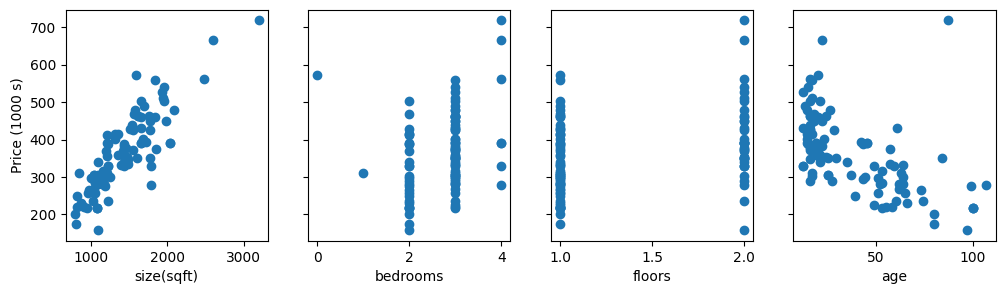

intial cost =71369.2230479192, for intial parameters w_init :[0. 0. 0. 0.],b_init0
Iteration    0: Cost 95588.40   
Iteration    1: Cost 128212.81   
Iteration    2: Cost 172159.44   
Iteration    3: Cost 231357.56   
Iteration    4: Cost 311100.10   
Iteration    5: Cost 418516.84   
Iteration    6: Cost 563211.90   
Iteration    7: Cost 758122.43   
Iteration    8: Cost 1020675.34   
Iteration    9: Cost 1374345.39   
intial cost =1374344.559172644, for intial parameters w_init :[-0.86831498 -0.00165867 -0.0009115  -0.02720726],b_init0
Iteration    0: Cost 1277817.10   
Iteration    1: Cost 1188077.00   
Iteration    2: Cost 1104647.00   
Iteration    3: Cost 1027083.40   
Iteration    4: Cost 954973.72   
Iteration    5: Cost 887934.44   
Iteration    6: Cost 825609.04   
Iteration    7: Cost 767666.07   
Iteration    8: Cost 713797.36   
Iteration    9: Cost 663716.44   
intial cost =663716.7281347844, for intial parameters w_init :[-0.52562811 -0.00108854 -0.00065916 -0.02506318],

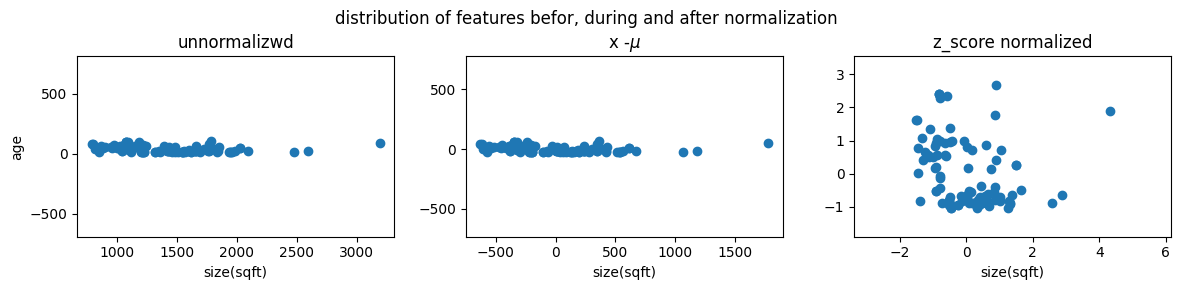



 peak to peak results 
x_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
 x_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
peak to peak range by column in raw data = [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
 peak to peak range by colum in normalized = [5.8452591  6.13529646 2.05626214 3.68533012]


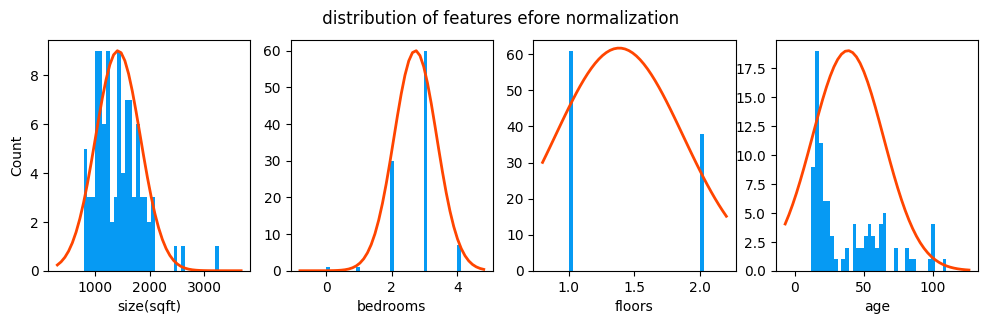

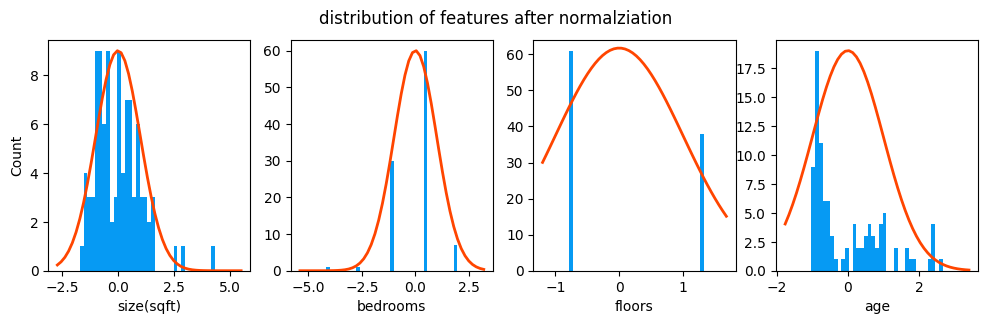

intial cost =71352.06021349745, for intial parameters w_init :[ 1.86744725e-01  2.12279972e-04  1.26954855e-05 -8.84325296e-03],b_init0
Iteration    0: Cost 57604.75   
Iteration  100: Cost   221.08   
Iteration  200: Cost   219.21   
Iteration  300: Cost   219.21   
Iteration  400: Cost   219.21   
Iteration  500: Cost   219.21   
Iteration  600: Cost   219.21   
Iteration  700: Cost   219.21   
Iteration  800: Cost   219.21   
Iteration  900: Cost   219.21   
intial cost =66160.37633832516, for intial parameters w_init :[110.56039756 -21.26715096 -32.70718139 -37.97015909],b_init0
Iteration    0: Cost 53631.55   
Iteration 1000: Cost   219.21   
Iteration 2000: Cost   219.21   
Iteration 3000: Cost   219.21   
Iteration 4000: Cost   219.21   
Iteration 5000: Cost   219.21   
Iteration 6000: Cost   219.21   
Iteration 7000: Cost   219.21   
Iteration 8000: Cost   219.21   
Iteration 9000: Cost   219.21   

 prediction results 


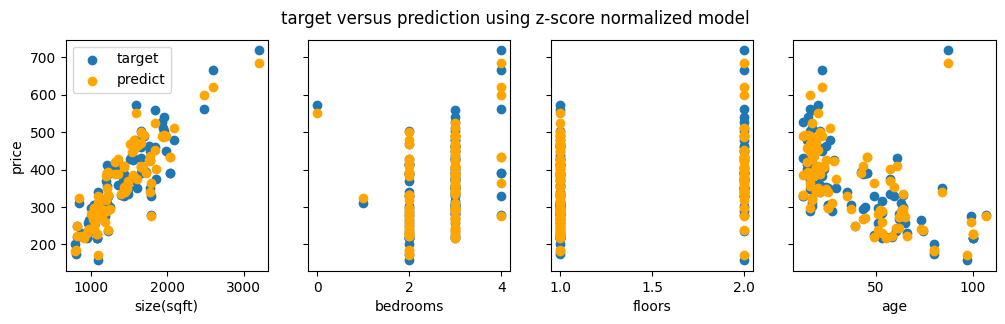

[-0.53052829  0.43380884 -0.78927234  0.06269567]
predicted price of house with 1200 sqft,3 bedrooms , 1 floor,40 years old =$318709
w : [110.56039756 -21.26715096 -32.70718139 -37.97015909], b 363.15608080808056


In [ ]:
#feature scaling lab
from google.colab import drive
drive.mount("/content/drive")

file_path ="/content/drive/MyDrive/ML Specialization/houses.txt"
with open(file_path,'r') as f:
  test=f.read()

import numpy as np
import matplotlib.pyplot as plt
def load_house_data():
    data = np.loadtxt("/content/drive/MyDrive/ML Specialization/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

x_train,y_train =load_house_data()
x_features =['size(sqft)','bedrooms','floors','age']

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000 s)")
plt.show()

w =np.zeros(x_train.shape[1])
cost,w,b,j =gradiant_descent_multiple_variables(x_train,y_train,w,0,9.9e-7,10)
#cost increase ,let's try new value of learning rate less value
cost,w,b,j =gradiant_descent_multiple_variables(x_train,y_train,w,0,9e-7,10)
#notice on previous example value decrease
cost,w,b,j =gradiant_descent_multiple_variables(x_train,y_train,w,0,1e-7,10)


#let's create z score normalization
def z_score_normalization(x):
  mu=np.mean(x,axis =0)
  sigma =np.std(x,axis=0)
  x_norm =(x-mu)/sigma
  return (x_norm,mu,sigma)

print("\n\n results after normalization ")
mu =np.mean(x_train,axis =0)
sigma= np.std(x_train,axis=0)
x_mean =x_train-mu
x_norm =(x_train-mu)/sigma

fig,ax=plt.subplots(1,3,figsize=(12,3))
ax[0].scatter(x_train[:,0],x_train[:,3])
ax[0].set_xlabel(x_features[0]);ax[0].set_ylabel(x_features[3]);
ax[0].set_title("unnormalizwd")
ax[0].axis("equal")

ax[1].scatter(x_mean[:,0],x_mean[:,3])
ax[1].set_xlabel(x_features[0]);ax[0].set_ylabel(x_features[3]);
ax[1].set_title(r"x -$\mu$")
ax[1].axis("equal")

ax[2].scatter(x_norm[:,0],x_norm[:,3])
ax[2].set_xlabel(x_features[0]);ax[0].set_ylabel(x_features[3])
ax[2].set_title(r"z_score normalized")
ax[2].axis("equal")
plt.tight_layout(rect=[0,0.03,1,0.95])
fig.suptitle("distribution of features befor, during and after normalization")
plt.show()


#now let's use z_score function
print("\n\n peak to peak results ")
x_norm,mu,sigma=z_score_normalization(x_train)
print(f"x_mu = {mu}, \n x_sigma = {sigma}")
print(f"peak to peak range by column in raw data = {np.ptp(x_train,axis=0)}")
print(f" peak to peak range by colum in normalized = {np.ptp(x_norm,axis=0)}")

# define norm plot function

from scipy.stats import norm
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    #ax.set_ylabel("Count")

    mu = np.mean(data);
    std = np.std(data);
    dist = norm.pdf(bins, loc=mu, scale = std)

    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

#let's check the distribution
fig,ax =plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
  norm_plot(ax[i],x_train[:,i],)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Count")
fig.suptitle(" distribution of features efore normalization")
plt.show()

fig,ax =plt.subplots(1,4,figsize=(12,3))
for i  in range(len(ax)):
  norm_plot(ax[i],x_norm[:,i],)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Count")
fig.suptitle("distribution of features after normalziation ")
plt.show()


#let's try new gradiant descent again with even large alpha =1.0e-1
cost,w,b,j =gradiant_descent_multiple_variables(x_norm,y_train,w,0,1.0e-1,1000)

cost,w,b,j =gradiant_descent_multiple_variables(x_norm,y_train,w,0,0.1,10000)

print("\n prediction results ")
m =x_norm.shape[0]
yp =np.zeros(m)
for i  in range(m):
  yp[i]=np.dot(x_norm[i],w)+b

fig,ax=plt.subplots(1,4,figsize=(12,3),sharey =True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train,label="target")
  ax[i].set_xlabel(x_features[i])
  ax[i].scatter(x_train[:,i],yp,color='orange',label='predict')
ax[0].set_ylabel("price");ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()


#now yo have w,b and you can predict any value
#first you need to normalize function
x_house=np.array([1200,3,1,40])
x_house_norm=(x_house-mu)/sigma # we got mu and sigma from origianl dat and this new example
print(x_house_norm)
x_house_predict =np.dot(x_house_norm,w)+b
print(f"predicted price of house with 1200 sqft,3 bedrooms , 1 floor,40 years old =${x_house_predict*1000:0.0f}")
print(f"w : {w}, b {b}")


intial cost =224690.30726127923, for intial parameters w_init :[0.],b_init785.1811367994083
Iteration    0: Cost 102014.54   
Iteration  100: Cost 55409.69   
Iteration  200: Cost 32601.27   
Iteration  300: Cost 19256.49   
Iteration  400: Cost 11448.72   
Iteration  500: Cost  6880.53   
Iteration  600: Cost  4207.78   
Iteration  700: Cost  2644.00   
Iteration  800: Cost  1729.06   
Iteration  900: Cost  1193.75   


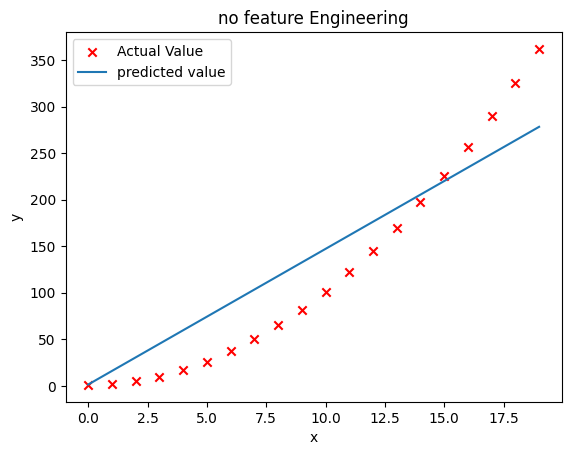

intial cost =224690.30726127923, for intial parameters w_init :[0.],b_init785.1811367994083
Iteration    0: Cost 184113.19   
Iteration 1000: Cost 139489.23   
Iteration 2000: Cost 138217.76   
Iteration 3000: Cost 136957.88   
Iteration 4000: Cost 135709.48   
Iteration 5000: Cost 134472.46   
Iteration 6000: Cost 133246.72   
Iteration 7000: Cost 132032.15   
Iteration 8000: Cost 130828.65   
Iteration 9000: Cost 129636.12   


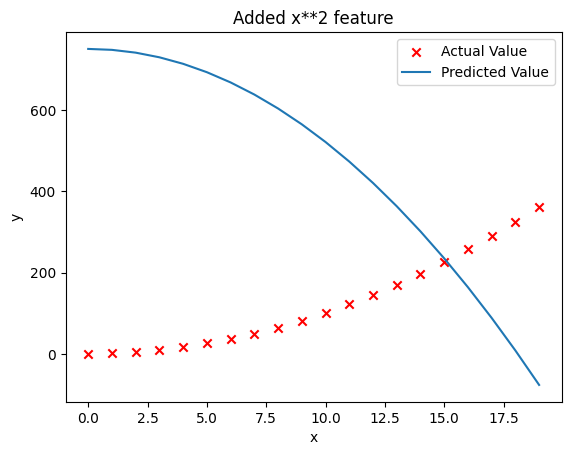

w : [-2.28836206], b 750.0766862442501


In [ ]:
#feature engineering lab and ploynomial regression
import numpy as np
import matplotlib.pyplot as plt

x =np.arange(0,20,1)
y =1+x**2
x =x.reshape(-1,1)
b_nint =0
w_init =np.zeros(x.shape[1])
cost,w,b ,j=gradiant_descent_multiple_variables(x,y,w_init,b_init,1e-2,1000)
plt.scatter(x,y,marker='x',c='r',label="Actual Value")
plt.title("no feature Engineering")
plt.plot(x,x@w+b,label="predicted value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#what we are going to do is changing the original data, that's feature engineering
x =np.arange(0,20,1)
y =1+(x**2)
x_square=x**2 # this is the new feature
x_square=x_square.reshape(-1,1)
b_nint =0
w_init =np.zeros(x_square.shape[1])
cost,w,b,j=gradiant_descent_multiple_variables(x_square,y,w_init,b_init,1e-5,10000)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(x_square,w) + b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


#let's try new one


peak to peak y column in raw [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
peak to peak by column in normalized [5.8452591  6.13529646 2.05626214 3.68533012]
SGDRegressor()
number of iterations completed;131, number of weight update :12970.0
model parameters:                   w: [110.25371255 -21.10300743 -32.52360982 -38.00921303], b:[363.15930875]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16
prediction using np.dot() and sgdr.predict match :True
prediction on training set :
[295.1968127  485.92351152 389.59724517 492.08676231]
prediction on training set using model  :
[295.1968127  485.92351152 389.59724517 492.08676231]
target values 
 [300.  509.8 394.  540. ]


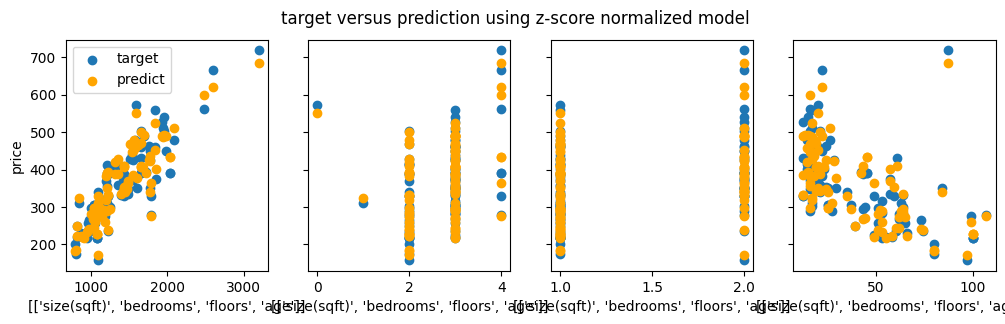

In [ ]:
# linear regressing using scikit learn lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
# sklearn.linear_model.SGDRegressor is doing good with normalized data, you can do normalized data with
# use sklearn.preprocessing.StandardScaler to do the z-score normalization

# let's download ata
x_train,y_train =load_house_data()
x_features =['size(sqft)','bedrooms','floors','age']

scaler =StandardScaler()
x_norm  =scaler.fit_transform(x_train)
print(f"peak to peak y column in raw {np.ptp(x_train,axis=0)}")
print(f"peak to peak by column in normalized {np.ptp(x_norm,axis=0)}")

# let's create model
sgdr =SGDRegressor(max_iter =1000)
sgdr.fit(x_norm,y_train)
print(sgdr)
print(f"number of iterations completed;{sgdr.n_iter_}, number of weight update :{sgdr.t_}")


b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

#let's make prediction
y_pred_sgdr =sgdr.predict(x_norm)
y_pred =np.dot(x_norm,w_norm)+b_norm
print(f"prediction using np.dot() and sgdr.predict match :{(y_pred==y_pred_sgdr).all()}")
print(f"prediction on training set :\n{y_pred[:4]}")
print(f"prediction on training set using model  :\n{y_pred_sgdr[:4]}")
print(f"target values \n {y_train[:4]}")


# let' plot results
fig,ax =plt.subplots(1,4,figsize=(12,3),sharey =True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train,label="target")
  ax[i].set_xlabel([x_features])
  ax[i].scatter(x_train[:,i],y_pred,color="orange",label='predict')
ax[0].set_ylabel("price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()




In [ ]:
#sklearn normal solution lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # check differnce between this one and SGDRegressor

#let's create data
x_train =np.array([1.0,2.0])
y_train =np.array([300,500])

#not we didn't do normalization as we have very small data
linear_model = LinearRegression()
print(f"dimension of x_train sata {x_train.ndim}")
print(f"dimensions of x_train after rehsaping {x_train.reshape(-1,1).ndim}") #i think LInearReression models can't handle one dimension array
linear_model.fit(x_train.reshape(-1,1),y_train)

b =linear_model.intercept_
w =linear_model.coef_
print(f"ww = {w}, b ={b:0.2f}")
print(f" manual prediction : f_wb =wx+b :{1200*w +b}")

#let's make prediction
y_pred =linear_model.predict(x_train.reshape(-1,1))
print("prediction on training set:",y_pred)
x_test =np.array([[1200]])
print(f"Prediction for 1200 sqft house: ${linear_model.predict(x_test)[0]:0.2f}")


#let's try model with larger data
x_train,y_train =load_house_data()
x_features=['size(sqft)',"bedrooms","floors",'age']
liear_model =LinearRegression()
linear_model.fit(x_train,y_train)

b =linear_model.intercept_
w =linear_model.coef_
print(f"w ={w:}, b= {b:0.2f}")

print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

dimension of x_train sata 1
dimensions of x_train after rehsaping 2
ww = [200.], b =100.00
 manual prediction : f_wb =wx+b :[240100.]
prediction on training set: [300. 500.]
Prediction for 1200 sqft house: $240100.00
w =[  0.26860107 -32.62006902 -67.25453872  -1.47297443], b= 220.42
Prediction on training set:
 [488.91944767 309.47238431 265.2208618 ]
prediction using w,b:
 [488.91944767 309.47238431 265.2208618 ]
Target values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
type of x_train <class 'numpy.ndarray'>
first five elements of x_train are :
  [6.1101 5.5277 8.5186 7.0032 5.8598]
type of y_train : <class 'numpy.ndarray'>
First five elements of y_train [17.592   9.1302 13.662  11.854   6.8233]
the shape of x_train is : (97,)
shape of y_trains is : (97,)
number of examples on training set 97


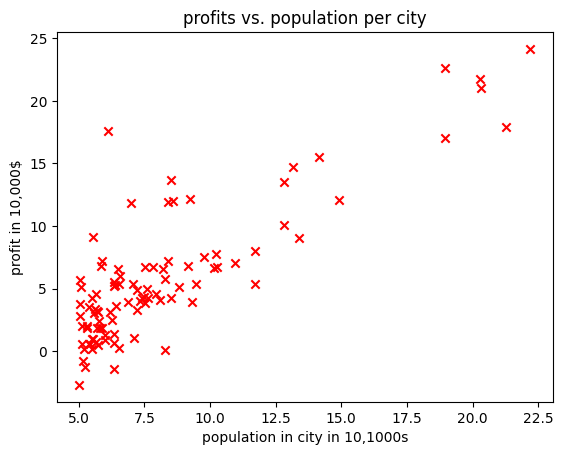

<class 'numpy.float64'>
cost at initialw (zeros)75.203
gradiant at initial w,b (zeros) : -65.32884974555672 -5.83913505154639
 Gradiant Initial w,b (zeros) : -49.048061181144334 -4.207175051546391
 total cost at initial values of w= 0.0 and b= 0.0 is equal 32.072733877455654
Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b, fond by gradiant descent: 1.166362350335582 -3.63029143940436


Text(0.5, 0, 'population of cit in 10,000 s')

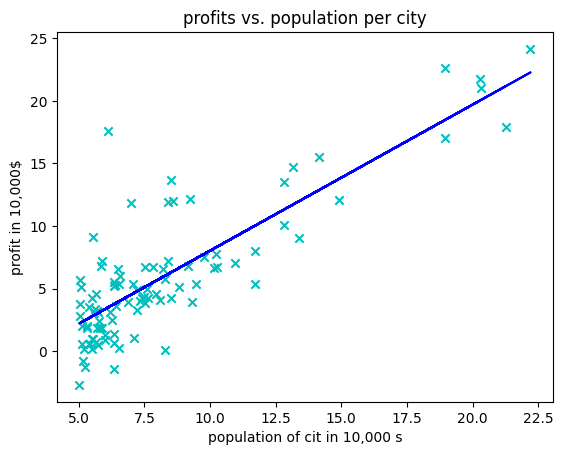

In [ ]:
#week 2 finale practice lab
from google.colab import drive
drive.mount("/content/drive")

# let's create data laoding functions
def load_data():
  data =np.loadtxt("/content/drive/MyDrive/ML Specialization/ex1data1.txt",delimiter =',')
  x =data[:,0]
  y =data[:,1]
  return x,y

def load_data_multi():
  data =np.loadtxt("/content/drive/MyDrive/ML Specialization/ex1data2.txt",delimiter=',')
  x =data[:,0]
  y =data[:,1]
  return x,y

#now let's move to lab
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

x_train,y_train =load_data()
print(f"type of x_train {type(x_train)}")
print(f"first five elements of x_train are :\n ",x_train[:5]) #shows number of population 10 times , so 6  means 60000

print(f"type of y_train :",type(y_train))
print("First five elements of y_train",y_train[:5])
#values of y represent average monthly profit in units of 10000$
# so value with 3 means 30000
# there is values on negative and posoitive

#let's cehck simensions of my variables
print(f"the shape of x_train is :",x_train.shape)
print(f"shape of y_trains is :",y_train.shape)
print(f"number of examples on training set",len(x_train))

#it's ofter useful to understand the data by viualizing it
#we use sctter plot to see corrlation between each pair of prperties
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("profits vs. population per city")
plt.ylabel("profit in 10,000$")
plt.xlabel("population in city in 10,1000s")
plt.show()

#let's create function to compute cost function
def compute_cost(x,y,w,b):
  m =x.shape[0]
  cost =0
  for i in range(m):
    fw_b =np.dot(x[i],w)+b
    cost_init= (fw_b-y[i])**2
    cost =cost+cost_init
  total_cost =cost/(2*m)
  return total_cost
#let's give it a try
initial_w =2
initial_b =1
cost =compute_cost(x_train,y_train,initial_w,initial_b)
print(type(cost))
print(f"cost at initialw (zeros){cost:.3f}")

# gradiant  for on varaible again
# note : we arecomputing gradinat only at first not the

def compute_gradiant(x,y,w,b):
  m =x.shape[0]
  dj_dw=0
  dj_db=0
  for i in range(m):
    f_wb =(x[i]*w)+b
    dj_db += f_wb - y[i]
    dj_dw += (f_wb - y[i])*x[i]
  dj_db =dj_db/m
  dj_dw =dj_dw/m

  return dj_dw,dj_db

#let's check the gradiant
initial_w =0
initial_b =0

temp_dj_dw,temp_dj_db =compute_gradiant(x_train,y_train,initial_w,initial_b)
print("gradiant at initial w,b (zeros) :",temp_dj_dw,temp_dj_db)

#let's check for another value
initial_w =0.2
intial_b =0.2
temp_dj_dw,temp_dj_db =compute_gradiant(x_train,y_train,initial_w,initial_b)
print(" Gradiant Initial w,b (zeros) :",temp_dj_dw,temp_dj_db)


def gradiant_descent(x,y,w_in,b_in,cost_function,gradiant_function,alpha,num_iters):
  m =len(x)
  w =copy.deepcopy(w_in)
  b=b_in
  J_history = []
  w_history = []
  print(f" total cost at initial values of w= {w} and b= {b} is equal {cost_function(x, y, w, b)}")
  for i in range(num_iters):
    dj_dw,dj_db =gradiant_function(x,y,w,b)
    w=w-(alpha*dj_dw)
    b=b-(alpha*dj_db)
    if i<100000:
      cost = cost_function(x, y, w, b)
      J_history.append(cost)
    if i% math.ceil(num_iters/10) == 0:
      w_history.append(w)
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
  return w,b,J_history,w_history


#let's try this gradiant descent function
initial_w =0.
initial_b =0.
itreations =1500
alpha =0.01
w,b,_,_= gradiant_descent(x_train,y_train,initial_w,initial_b,
                          compute_cost,compute_gradiant,alpha,itreations)
print("w,b, fond by gradiant descent:",w,b)


#let's use the w and b we got from gradiant descent to compute predicted values
#notice that : only final values of w and b are saved as w and b
m =x_train.shape[0]
predicted =np.zeros(m)

for i in range(m):
  predicted[i]=x_train[i]*w+b

#let's plot the previous values of
plt.plot(x_train,predicted,c='b')
plt.scatter(x_train,y_train,marker='x',c='rc')

plt.title("profits vs. population per city")
plt.ylabel("profit in 10,000$")
plt.xlabel("population of cit in 10,000 s")



predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

In [ ]:
w

1.166362350335582